In [ ]:
# http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=AMEX
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')

# Display first 10 rows
nasdaq.head(10)

# Inspect nasdaq
nasdaq.info()

# Great! Note that a symbol other than np.nan is used to indicate missing values, and all columns are of type object or float64.

In [ ]:
# Two optional arguments that you can add to .read_csv() to better represent the data from an external file are na_values, which converts a given string to np.nan, and parse_dates, which reads the data in a list of given columns as dtype datetime64.
# pandas.read_csv(na_values=None, parse_dates=False, ...)
# Which of the following steps should you take to make sure that the data imported from nasdaq-listings.csv are accurately represented?
# Add the argument na_values=['NAN'] to pd.read_csv().
# Add parse_dates='Last Update' to pd.read_csv().

In [ ]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
nasdaq.head()

# Inspect the data
nasdaq.info()

In [ ]:
# As you just learned, you can import data from a sheet of an Excel file with the pd.read_excel() function by assigning the optional sheetname argument to an integer indicating its position or a string containing its name.
# pandas.read_excel(io, sheetname=0, na_values=None, ...)
# Import the data
nyse = pd.read_excel('listings.xlsx', na_values="n/a", sheetname="nyse")

# Display the head of the data
nyse.head()

# Inspect the data
nyse.info()

In [4]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names
exchanges
# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname = exchanges, na_values='n/a')
print(listings)
# Inspect NASDAQ listings
listings['nasdaq'].info()

NameError: name 'pd' is not defined

In [ ]:
# Load all listing data and iterate over key-value dictionary pairs
# You already know that a pd.DataFrame() object is a two-dimensional labeled data structure. As you saw in the video, the pd.concat() function is used to concatenate, or vertically combine, two or more DataFrames. You can also use broadcasting to add new columns to DataFrames.
# In this exercise, you will practice using this new pandas function with the data from the NYSE and NASDAQ exchanges.
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheetname='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq])

In [ ]:
# Automate the loading and combining of data from multiple Excel worksheets
# Create the pd.ExcelFile() object
xls = pd.ExcelFile("listings.xlsx")

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

In [9]:
from pandas_datareader import DataReader
from datetime import date
start = date(2015, 1 ,1)
end = date(2017, 7, 31)
ticker = "MSFT"
data_source = "google"
stock_data = DataReader(ticker, data_source, start, end)
stock_data.tail()

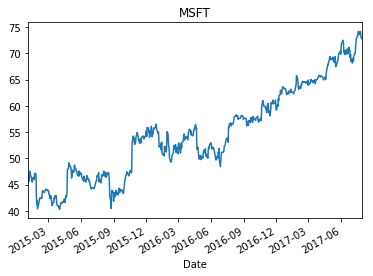

In [12]:
import matplotlib.pyplot as plt
stock_data['Close'].plot(title = ticker); plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12875 entries, 1968-04-01 to 2017-08-04
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12479 non-null float64
dtypes: float64(1)
memory usage: 201.2 KB


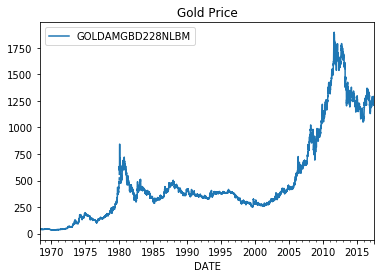

In [13]:
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import date
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, "fred", start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title = "Gold Price")
# Show the plot
plt.show()

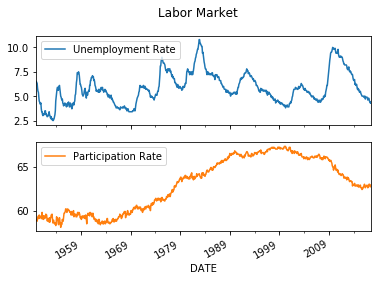

In [3]:
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import date
# Compare labor market participation and unemployment rates
# Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').
# These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.
#This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.
# Here, you will import, modify, and plot the data.

# Set the start date
start = date(1950, 1 , 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, data_source = "fred", start = start)

# Assign new column labels
econ_data.columns = ["Unemployment Rate", "Participation Rate"]

# Plot econ_data
econ_data.plot(subplots= True, title = "Labor Market")

# Show the plot
plt.show();

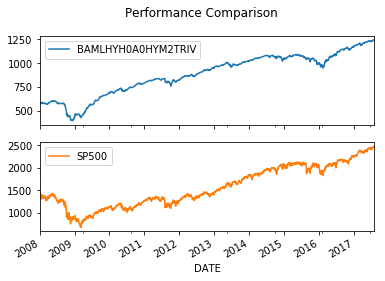

In [16]:
# Compare bond and stock performance
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import date
# Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.
# For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.
# In this exercise, you will download both series and compare their performance.
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, "fred", start)

# Plot the results
data.plot(subplots = True, title = "Performance Comparison")

# Show the plot
plt.show();

In [6]:
# Select the top 5 listed consumer companies
# As you have just learned, it is possible to filter stocks based on criteria with the sort_values() method and an argument that specifies the column to filter by. Additionally, you can include the argument ascending=False to sort entries from highest to lowest.
# Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company.
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import date
import pandas as pd
# Select companies in Consumer Services
consumer_services = listings[listings.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services = consumer_services.sort_values("Market Capitalization", ascending=False)

# Display first 5 rows of designated columns
consumer_services[['Company Name', 'Exchange', 'Market Capitalization']].head()

NameError: name 'listings' is not defined

In [ ]:
# Get the ticker of the largest consumer services company
# Instead of indexing your data with a conditional expression, you can also filter by certain values with .loc[row_selector, column_selector]. Additionally, you can use .set_index() to set a particular column with unique values as the index of a DataFrame, and .idxmax() to return the index of the maximum value.
# In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend.
# DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported, as has the listings DataFrame from the last exercise.
# Set Stock Symbol as the index
listings = listings.set_index('Stock Symbol')

# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(1998, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show();

In [ ]:
# Get data for the 3 largest financial companies
# A pd.MultiIndex() object has more than one identifier per row. This allows you to get the data based on criteria for multiple companies at once.
# Let's apply this new skill to get the stock prices for the largest companies in the financial sector.
# Set Stock Symbol as the index
listings = listings.set_index("Stock Symbol")

# Get ticker of 3 largest finance companies
top_3_companies = listings.loc[listings.Sector == 'Finance', 'Market Capitalization'].nlargest(3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()
top_3_tickers
# Set start date
start = date(2008,1,1)

# Import stock data
data = DataReader(top_3_tickers, "google", start)
data = data.to_frame()
data.head()
# Unstack and inspect result
data['Close'].unstack().info()

In [2]:
# Functions with one default argument
# In the previous chapter, you've learned to define functions with more than one parameter and then calling those functions by passing the required number of arguments. In the last video, Hugo built on this idea by showing you how to define functions with default arguments. You will practice that skill in this exercise by writing a function that uses a default argument and then calling the function a couple of times.
# Define shout_echo
def shout_echo(word1, echo = 1):
    """Concatenate echo copies of word1 and three
     exclamation marks at the end of the string."""

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = echo * word1

    # Concatenate '!!!' to echo_word: shout_word
    shout_word = echo_word + '!!!'

    # Return shout_word
    return shout_word

# Call shout_echo() with "Hey": no_echo
no_echo = shout_echo("Hey")

# Call shout_echo() with "Hey" and echo=5: with_echo
with_echo = shout_echo("Hey", 5)

# Print no_echo and with_echo
print(no_echo)
print(with_echo)

Hey!!!
HeyHeyHeyHeyHey!!!


In [4]:
# Functions with multiple default arguments
# You've now defined a function that uses a default argument - don't stop there just yet! You will now try your hand at defining a function with more than one default argument and then calling this function in various ways.
# After defining the function, you will call it by supplying values to all the default arguments of the function. Additionally, you will call the function by not passing a value to one of the default arguments - see how that changes the output of your function!
# Define shout_echo
def shout_echo(word1, echo = 1, intense = False):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Capitalize echo_word if intense is True
    if intense is True:
        # Capitalize and concatenate '!!!': echo_word_new
        echo_word_new = echo_word.upper() + '!!!'
    else:
        # Concatenate '!!!' to echo_word: echo_word_new
        echo_word_new = echo_word + '!!!'

    # Return echo_word_new
    return echo_word_new

# Call shout_echo() with "Hey", echo=5 and intense=True: with_big_echo
with_big_echo = shout_echo("Hey", 5, True)

# Call shout_echo() with "Hey" and intense=True: big_no_echo
big_no_echo = shout_echo("Hey", intense = True)

# Print values
print(with_big_echo)
print(big_no_echo)

HEYHEYHEYHEYHEY!!!
HEY!!!


In [5]:
# Function with variable-length arguments (*args)
# Flexible arguments enable you to pass a variable number of arguments to a function. In this exercise, you will practice defining a function that accepts a variable number of string arguments.
# The function you will define is gibberish() which can accept a variable number of string values. Its return value is a single string composed of all the string arguments concatenated together in the order they were passed to the function call. You will call the function with a single string argument and see how the output changes with another call using more than one string argument. Recall from the previous video that, within the function definition, args is a tuple.
# Define gibberish
def gibberish(*args):
    """Concatenate strings in *args together."""

    # Initialize an empty string: hodgepodge
    hodgepodge = str()

    # Concatenate the strings in args
    for word in args:
        hodgepodge += word

    # Return hodgepodge
    return(hodgepodge)

# Call gibberish() with one string: one_word
one_word = gibberish("luke")

# Call gibberish() with five strings: many_words
many_words = gibberish("luke", "leia", "han", "obi", "darth")

# Print one_word and many_words
print(one_word)
print(many_words)

luke
lukeleiahanobidarth


In [6]:
# Function with variable-length keyword arguments (**kwargs)
# Let's push further on what you've learned about flexible arguments - you've used *args, you're now going to use **kwargs! What makes **kwargs different is that it allows you to pass a variable number of keyword arguments to functions. Recall from the previous video that, within the function definition, kwargs is a dictionary.
# To understand this idea better, you're going to use **kwargs in this exercise to define a function that accepts a variable number of keyword arguments. The function simulates a simple status report system that prints out the status of a character in a movie.
# Define report_status
def report_status(**kwargs):
    """Print out the status of a movie character."""

    print("\nBEGIN: REPORT\n")

    # Iterate over the key-value pairs of kwargs
    for name, affiliation in kwargs.items():
        # Print out the keys and values, separated by a colon ':'
        print(name + ": " + affiliation)

    print("\nEND REPORT")

# First call to report_status()
report_status(name = "luke", affiliation = "jedi", status = "missing")

# Second call to report_status()
report_status(name= "anakin", affiliation= "sith lord", status= "deceased")


BEGIN: REPORT

name: luke
affiliation: jedi
status: missing

END REPORT

BEGIN: REPORT

name: anakin
affiliation: sith lord
status: deceased

END REPORT


In [ ]:
# Bringing it all together (1)
# Recall the Bringing it all together exercise in the previous chapter where you did a simple Twitter analysis by developing a function that counts how many tweets are in certain languages. The output of your function was a dictionary that had the language as the keys and the counts of tweets in that language as the value.
# In this exercise, we will generalize the Twitter language analysis that you did in the previous chapter. You will do that by including a default argument that takes a column name.
# For your convenience, pandas has been imported as pd and the 'tweets.csv' file has been imported into the DataFrame tweets_df. Parts of the code from your previous work are also provided.
# Define count_entries()
def count_entries(df, col_name = "lang"):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    # Initialize an empty dictionary: cols_count
    cols_count = {}

    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in DataFrame
    for entry in col:

        # If entry is in cols_count, add 1
        if entry in cols_count.keys():
            cols_count[entry] += 1

        # Else add the entry to cols_count, set the value to 1
        else:
            cols_count[entry] = 1

    # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, "lang")

# Call count_entries(): result2
result2 = count_entries(tweets_df, "source")

# Print result1 and result2
print(result1)
print(result2)

In [ ]:
# Bringing it all together (2)
# Wow, you've just generalized your Twitter language analysis that you did in the previous chapter to include a default argument for the column name. You're now going to generalize this function one step further by allowing the user to pass it a flexible argument, that is, in this case, as many column names as the user would like!
# Once again, for your convenience, pandas has been imported as pd and the 'tweets.csv' file has been imported into the DataFrame tweets_df. Parts of the code from your previous work are also provided.
# Define count_entries()
def count_entries(df, *args):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    #Initialize an empty dictionary: cols_count
    cols_count = {}
    
    # Iterate over column names in args
    for col_name in args:
    
        # Extract column from DataFrame: col
        col = df[col_name]
    
        # Iterate over the column in DataFrame
        for entry in col:
    
            # If entry is in cols_count, add 1
            if entry in cols_count.keys():
                cols_count[entry] += 1
    
            # Else add the entry to cols_count, set the value to 1
            else:
                cols_count[entry] = 1

    # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, "lang")

# Call count_entries(): result2
result2 = count_entries(tweets_df, "lang", "source")

# Print result1 and result2
print(result1)
print(result2)

In [13]:
# Writing a lambda function you already know
# Define echo_word as a lambda function: echo_word
echo_word = (lambda word1, echo: word1*echo)

# Call echo_word: result
result = echo_word("hey", 5)

# Print result
print(result)

heyheyheyheyhey


In [14]:
# Map() and lambda functions
# Create a list of strings: spells
spells = ["protego", "accio", "expecto patronum", "legilimens"]

# Use map() to apply a lambda function over spells: shout_spells
shout_spells = map(lambda a: a + "!!!", spells)

# Convert shout_spells to a list: shout_spells_list
shout_spells_list = list(shout_spells)

# Convert shout_spells into a list and print it
print(shout_spells_list)

['protego!!!', 'accio!!!', 'expecto patronum!!!', 'legilimens!!!']


In [15]:
# Filter() and lambda functions
# In the previous exercise, you used lambda functions to anonymously embed an operation within map(). You will practice this again in this exercise by using a lambda function with filter(), which may be new to you! The function filter() offers a way to filter out elements from a list that don't satisfy certain criteria.
# Your goal in this exercise is to use filter() to create, from an input list of strings, a new list that contains only strings that have more than 6 characters.
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']
len(fellowship[1])
# Use filter() to apply a lambda function over fellowship: result
result = filter(lambda a: len(a) > 6 , fellowship)

# Convert result to a list: result_list
result_list = list(result)

# Convert result into a list and print it
print(result_list)

['samwise', 'aragorn', 'legolas', 'boromir']


In [16]:
# Reduce() and lambda functions
# You're getting very good at using lambda functions! Here's one more function to add to your repertoire of skills. The reduce() function is useful for performing some computation on a list and, unlike map() and filter(), returns a single value as a result. To use reduce(), you must import it from the functools module.
# gibberish() simply takes a list of strings as an argument and returns, as a single-value result, the concatenation of all of these strings. In this exercise, you will replicate this functionality by using reduce() and a lambda function that concatenates strings together.
# Import reduce from functools
from functools import reduce

#In the reduce() call, pass a lambda function that takes two string arguments item1 and item2 and concatenates them; also pass the list of strings, stark. Assign the result to result. The first argument to reduce() should be the lambda function and the second argument is the list stark.
# Create a list of strings: stark
stark = ['robb', 'sansa', 'arya', 'eddard', 'jon']

# Use reduce() to apply a lambda function over stark: result
result = reduce(lambda item1, item2: item1 + item2, stark)

# Print the result
print(result)

robbsansaaryaeddardjon


In [18]:
# Introduction to Error Handling
# len(525600) --> TypeError: object of type 'int' has no len()

# Error handling with try-except
# A good practice in writing your own functions is also anticipating the ways in which other people (or yourself, if you accidentally misuse your own function) might use the function you defined.
# As in the previous exercise, you saw that the len() function is able to handle input arguments such as strings, lists, and tuples, but not int type ones and raises an appropriate error and error message when it encounters invalid input arguments. One way of doing this is through exception handling with the try-except block.
# In this exercise, you will define a function as well as use a try-except block for handling cases when incorrect input arguments are passed to the function.
# Recall the shout_echo() function you defined in previous exercises; parts of the function definition are provided in the sample code. Your goal is to complete the exception handling code in the function definition and provide an appropriate error message when raising an error.
# Define shout_echo
def shout_echo(word1, echo=1):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Initialize empty strings: echo_word, shout_words
    echo_word = ""
    shout_words = ""
    

    # Add exception handling with try-except
    try:
        # Concatenate echo copies of word1 using *: echo_word
        echo_word = word1*echo

        # Concatenate '!!!' to echo_word: shout_words
        shout_words = echo_word + "!!!"
    except:
        # Print error message
        print("word1 must be a string and echo must be an integer.")

    # Return shout_words
    return shout_words

# Call shout_echo
shout_echo("particle", echo="accelerator")

word1 must be a string and echo must be an integer.


''

In [19]:
# Error handling by raising an error
# Another way to raise an error is by using raise. In this exercise, you will add a raise statement to the shout_echo() function you defined before to raise an error message when the value supplied by the user to the echo argument is less than 0.
# The call to shout_echo() uses valid argument values. To test and see how the raise statement works, simply change the value for the echo argument to a negative value. Don't forget to change it back to valid values to move on to the next exercise!
# Define shout_echo
def shout_echo(word1, echo=1):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Raise an error with raise
    if echo < 0:
        raise ValueError('echo must be greater than 0')

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Concatenate '!!!' to echo_word: shout_word
    shout_word = echo_word + '!!!'

    # Return shout_word
    return shout_word

# Call shout_echo
shout_echo("particle", echo=5)

'particleparticleparticleparticleparticle!!!'

In [ ]:
# Bringing it all together (1)
# This is awesome! You have now learned how to write anonymous functions using lambda, how to pass lambda functions as arguments to other functions such as map(), filter(), and reduce(), as well as how to write errors and output custom error messages within your functions. You will now put together these learnings to good use by working with a Twitter dataset. Before practicing your new error handling skills,in this exercise, you will write a lambda function and use filter() to select retweets, that is, tweets that begin with the string 'RT'.
# To help you accomplish this, the Twitter data has been imported into the DataFrame, tweets_df. Go for it!
# Select retweets from the Twitter DataFrame: result
result = filter(lambda x: x[0:2] == 'RT', tweets_df['text'])

# Create list from filter object result: res_list
res_list = list(result)

# Print all retweets in res_list
for tweet in res_list:
    print(tweet)

In [ ]:
# Bringing it all together (2)
# Sometimes, we make mistakes when calling functions - even ones you made yourself. But don't fret! In this exercise, you will improve on your previous work with the count_entries() function in the last chapter by adding a try-except block to it. This will allow your function to provide a helpful message when the user calls your count_entries() function but provides a column name that isn't in the DataFrame.
# Once again, for your convenience, pandas has been imported as pd and the 'tweets.csv' file has been imported into the DataFrame tweets_df. Parts of the code from your previous work are also provided.
# Define count_entries()
def count_entries(df, col_name='lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    # Initialize an empty dictionary: cols_count
    cols_count = {}

    # Add try block
    try:
        # Extract column from DataFrame: col
        col = df[col_name]
        
        # Iterate over the column in dataframe
        for entry in col:
    
            # If entry is in cols_count, add 1
            if entry in cols_count.keys():
                cols_count[entry] += 1
            # Else add the entry to cols_count, set the value to 1
            else:
                cols_count[entry] = 1
    
        # Return the cols_count dictionary
        return cols_count

    # Add except block
    except:
        print('The DataFrame does not have a ' + col_name + ' column.')

# Call count_entries(): result1
result1 = count_entries(tweets_df, 'lang')

# Print result1
print(result1)

# Call count_entries(): result2
result2 = count_entries(tweets_df, 'lang1')

In [ ]:
# Bringing it all together (3)
# In the previous exercise, you built on your function count_entries() to add a try-except block. This was so that users would get helpful messages when calling your count_entries() function and providing a column name that isn't in the DataFrame. In this exercise, you'll instead raise a ValueError in the case that the user provides a column name that isn't in the DataFrame.
# Once again, for your convenience, pandas has been imported as pd and the 'tweets.csv' file has been imported into the DatFrame tweets_df. Parts of the code from your previous work are also provided.
# Define count_entries()
def count_entries(df, col_name='lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Raise a ValueError if col_name is NOT in DataFrame
    if col_name not in df.columns:
        raise ValueError('The DataFrame does not have a ' + col_name + ' column.')

    # Initialize an empty dictionary: cols_count
    cols_count = {}
    
    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in DataFrame
    for entry in col:

        # If entry is in cols_count, add 1
        if entry in cols_count.keys():
            cols_count[entry] += 1
            # Else add the entry to cols_count, set the value to 1
        else:
            cols_count[entry] = 1
        
        # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, "lang")

# Print result1
print(result1)

In [ ]:
# Bringing it all together (3)
# In the previous exercise, you built on your function count_entries() to add a try-except block. This was so that users would get helpful messages when calling your count_entries() function and providing a column name that isn't in the DataFrame. In this exercise, you'll instead raise a ValueError in the case that the user provides a column name that isn't in the DataFrame.
# Once again, for your convenience, pandas has been imported as pd and the 'tweets.csv' file has been imported into the DatFrame tweets_df. Parts of the code from your previous work are also provided.
# Define count_entries()
def count_entries(df, col_name='lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Raise a ValueError if col_name is NOT in DataFrame
    if col_name not in df.columns:
        raise ValueError('The DataFrame does not have a ' + col_name + ' column.')

    # Initialize an empty dictionary: cols_count
    cols_count = {}
    
    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in DataFrame
    for entry in col:

        # If entry is in cols_count, add 1
        if entry in cols_count.keys():
            cols_count[entry] += 1
            # Else add the entry to cols_count, set the value to 1
        else:
            cols_count[entry] = 1
        
        # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, "lang")

# Print result1
print(result1)